In [ ]:
import polars as pl
import matplotlib.pyplot as plt
from models import create_model_pipeline

In [2]:
on_base_lf = pl.scan_parquet("../data/throw_home_runner_on_third_wide_sprint_arm.parquet")

responses = ["is_successful"]

num_predictors_drop = ["distance_catch_to_home"]

# Parameter grid
param_grid = {
    'penalty': ['elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
    'solver': ['saga'],
    'max_iter': [100, 250, 500, 1000]
}

scoring = {
    'log_loss': 'neg_log_loss',
    'brier_score': 'neg_brier_score'
}

refit = "brier_score"

# Train model
results = create_model_pipeline(
    on_base_lf=on_base_lf,
    responses=responses,
    num_predictors_drop=num_predictors_drop,
    model_type="LogisticRegression",
    oversampling_method="SMOTE",
    param_grid=param_grid,
    scoring=scoring,
    refit=refit,
    cv=5,
    verbose=True
)

Total features: 2
Total Predictors: 1
Total Responses: 1

Dataset shape after drop imputation: (6196, 1)
Response distribution: {True: 4825, False: 1371}
Fitting 5 folds for each of 120 candidates, totalling 600 fits

Best parameters: 
classifier__C = 100
classifier__l1_ratio = 0.9
classifier__max_iter = 100
classifier__penalty = elasticnet
classifier__solver = saga

Best cross-validation score: -0.0804

              precision    recall  f1-score   support

       False       0.68      0.89      0.77       411
        True       0.97      0.88      0.92      1448

    accuracy                           0.88      1859
   macro avg       0.82      0.89      0.85      1859
weighted avg       0.90      0.88      0.89      1859

Brier Score: 0.0837

Predictors:
distance_catch_to_home

Response:
is_successful


In [5]:
best_pipeline = results["pipeline"]
grid_search = results["grid_search"]
X_test = results["X_test"]
y_test = results["y_test"]
y_pred = results["y_pred"]
y_pred_proba = results["y_pred_proba"]

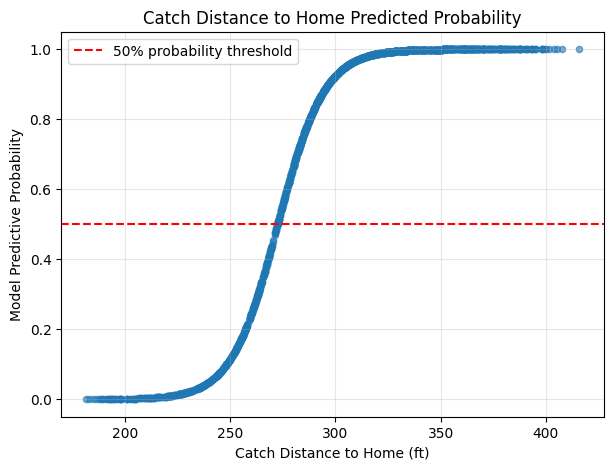

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(X_test, y_pred_proba, alpha=0.6, s=20)
plt.axhline(y=0.5, color='red', linestyle='--', label='50% probability threshold')
plt.xlabel('Catch Distance to Home (ft)')
plt.ylabel('Model Predictive Probability')
plt.title('Catch Distance to Home Predicted Probability')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


In [15]:
test_results = X_test.copy()
test_results['predicted_proba'] = y_pred_proba

distance_threshold = test_results.query("predicted_proba > 0.49 and predicted_proba < 0.51")

distance_threshold

,distance_catch_to_home,predicted_proba
4417,272.804734,0.505846
2798,272.357887,0.495683
311,272.461633,0.498042
2637,272.297593,0.494311
4119,272.885084,0.507674
4480,272.916294,0.508383
2315,272.523435,0.499448
2181,272.609813,0.501413
2639,272.579847,0.500731
2336,272.688509,0.503203
